<a href="https://colab.research.google.com/github/naruya/cookpad/blob/master/cookpad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request                                                                                
import bs4
import json
import pickle
import time

# 検索対象url番号
start, end = 0, 100  # 100万レシピくらいあるらしい? 0~42はない

# 取得した数
num = 0

# 検索を再開するurl番号
tmp = start

menu_keys = ['@context', '@type', 'name',
             'author', 'image', 'datePublished',
             'description', 'recipeYield', 'recipeIngredient',
             'recipeInstructions', 'cookTime']

menu = []

for i in range(tmp, end):
    tmp = i+1 # 次に検索し始めるurl番号を記録
    url = 'https://cookpad.com/recipe/' + str(i)
    try:
        time.sleep(0.01)  ### time.sleep(1) 推奨
        _menu = bs4.BeautifulSoup(urllib.request.urlopen(url).read(), "lxml")
        _menu = _menu.find("script", {"type": "application/ld+json"}).get_text()
        _menu = json.loads(_menu)
        if not len(_menu) == 0:
            print("found:", str(start) + '-' + str(end), num, url)
            menu.append(_menu)
            num += 1
    except urllib.error.HTTPError as e:
        continue

import os
os.makedirs("data_sample/", exist_ok=True)
with open('data_sample/menu-' + str(start) + '-' + str(end) + '.pkl', 'wb') as f:
    pickle.dump(menu, f)

found: 0-100 0 https://cookpad.com/recipe/54
found: 0-100 1 https://cookpad.com/recipe/56
found: 0-100 2 https://cookpad.com/recipe/59
found: 0-100 3 https://cookpad.com/recipe/65
found: 0-100 4 https://cookpad.com/recipe/70
found: 0-100 5 https://cookpad.com/recipe/76
found: 0-100 6 https://cookpad.com/recipe/77
found: 0-100 7 https://cookpad.com/recipe/80
found: 0-100 8 https://cookpad.com/recipe/81
found: 0-100 9 https://cookpad.com/recipe/84
found: 0-100 10 https://cookpad.com/recipe/86
found: 0-100 11 https://cookpad.com/recipe/91
found: 0-100 12 https://cookpad.com/recipe/92


In [2]:
with open('data_sample/menu-0-100.pkl', 'rb') as f:
    hoge = pickle.load(f)

for i in range(3): #range(len(hoge)):
    print()
    print(i)
    print('name: ', hoge[i]['name'])
    print('datePublished: ', hoge[i]['datePublished'])
    print('image: ', hoge[i]['image'])
    print('recipeIngredient: ', hoge[i]['recipeIngredient']) # 半角空白文字で区切られてる
    print('recipeInstructions: ', hoge[i]['recipeInstructions']) # リストになってる
    #print(hoge[i]) # json形式


0
name:  豚の角煮
datePublished:  1998-04-23
image:  ['https://img.cpcdn.com/recipes/54/640x640c/24961a2471402639cde9810843fc90ed?u=17&p=1214208216', 'https://img.cpcdn.com/recipes/54/640x480c/6961d3aa275f9e325e16f5415a7d7962?u=17&p=1214208216', 'https://img.cpcdn.com/recipes/54/640x360c/59bd652fa5d8b62f1a7e3095cef0eedc?u=17&p=1214208216']
recipeIngredient:  ['しょうが お好みで', 'ニンニク お好みで', 'ねぎ １本', '豚肉 バラのブロック２パック', '砂糖 小さじ１から２くらい', '酒 たくさん（安い日本酒でいい）', '醤油 適量（味見しながらね）', 'みりん 大さじ３くらい']
recipeInstructions:  [{'@type': 'HowToStep', 'text': '鍋に、水とたっぷりのお酒、ねぎの使わない葉の部分、しょうがの皮、にんにくを入れて、２，３時間煮込みます。'}, {'@type': 'HowToStep', 'text': 'その間、あくや浮いてきた脂を丁寧に取りましょう。煮込んだお肉を、いったん水で洗いましょう。'}, {'@type': 'HowToStep', 'text': '鍋に、豚肉をいれて、酒、砂糖、みりん、醤油、しょうが（薄切り）、にんにくで煮込みます。'}, {'@type': 'HowToStep', 'text': '落とし蓋をして１時間。食べるちょっと前にねぎを入れて、味がついたらたべましょう。写真のは、ちんげん菜を入れてみました。'}]

1
name:  わがやのおはぎ　part1
datePublished:  1998-04-24
image:  ['https://img.cpcdn.com/recipes/56/640x640c/dfe25222689598e9d42ca4f965e63d83?u=13&p=1214208216

found:  豚の角煮


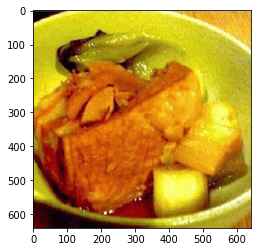

found:  わがやのおはぎ　part1


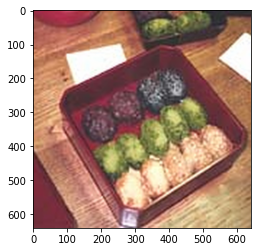

found:  エスプレッソプリン


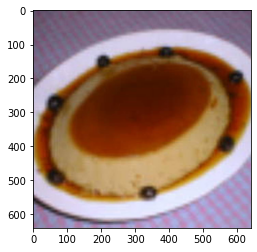

In [3]:
import pickle

import io
import urllib.request
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

# 「No Image」の画像(↓がURL) のときの画像はいらない
url_blacklist = ['https://assets.cpcdn.com/assets/blank_logo_kondate_spweb.png?6f9d23b17b11c778db08604964160405d12a573e53eccf4bc888897a2d931956']

with open( 'data_sample/menu-0-100.pkl', 'rb') as f:
    hoge = pickle.load(f)

for i in range(3):  # range(len(hoge)):
    url = hoge[i]['image'][0]
    if url in url_blacklist:
        print("[W] No Image\n")
    else:
        f = io.BytesIO(urllib.request.urlopen(url).read())
        img = Image.open(f)
        img = np.asarray(img)
        
        print('found: ', hoge[i]['name'])
        plt.imshow(img)
        plt.show()